In [2]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [1]:
%tensorflow_version 2.0.0
import tensorflow
print(tensorflow.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.4.0


In [ ]:
#import keras
#print(keras.__version__)

2.4.3


In [ ]:
!python --version

Python 3.6.9


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
TRAIN_IMAGE_DIR = '/content/drive/MyDrive/Salt Identification/train/images/'
TRAIN_MASK_DIR = '/content/drive/MyDrive/Salt Identification/train/masks/'

In [6]:
train_fns = os.listdir(TRAIN_IMAGE_DIR)

In [7]:
X = [np.array(cv2.imread(TRAIN_IMAGE_DIR + p, cv2.IMREAD_GRAYSCALE),dtype=np.uint8) for p in tqdm(train_fns)]

100%|██████████| 4000/4000 [25:10<00:00,  2.65it/s]


In [8]:
#divide by 255 to remove distortions
X = np.array(X)/255
X = np.expand_dims(X,axis=3)

In [9]:
y = [np.array(cv2.imread(TRAIN_MASK_DIR + p, cv2.IMREAD_GRAYSCALE), dtype=np.uint8) for p in tqdm(train_fns)]
y = np.array(y)/255
y = np.expand_dims(y,axis=3)

100%|██████████| 4000/4000 [24:01<00:00,  2.77it/s]


In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=23, test_size = 0.2)

Model Building

In [12]:
def conv_block(num_layers,inp,units,kernel):
    x = inp
    for l in range(num_layers):
        x = Conv2D(units, kernel_size=kernel, padding='SAME',activation='relu')(x)
    return x


inp = Input(shape=(101,101,1))
cnn1 = conv_block(4,inp,32,3)
cnn2 = conv_block(4,inp,24,5)
cnn3 = conv_block(4,inp,16,7)
concat = Concatenate()([cnn1,cnn2,cnn3])
d1 = Conv2D(16,1, activation='relu')(concat)
out = Conv2D(1,1, activation='sigmoid')(d1)

model = Model(inputs = inp, outputs = out)
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=tensorflow.keras.metrics.MeanIoU(num_classes=2))

#early_stop = EarlyStopping(patience=5)
#check_point = ModelCheckpoint('model.hdf5',save_best_only=True)
model.fit(X_train,y_train, epochs=20, validation_data=(X_valid,y_valid), batch_size=128)
model.save('first_model.h5')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 101, 101, 1) 0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 101, 101, 32) 320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 101, 101, 24) 624         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 101, 101, 16) 800         input_2[0][0]                    
____________________________________________________________________________________________

In [13]:
model.save('/content/first_model.h5')

In [14]:
from tensorflow.keras.models import load_model

In [15]:
models = load_model('/content/first_model.h5')
X_input = [np.array(cv2.imread('/content/000a68e46c.png', cv2.IMREAD_GRAYSCALE),dtype=np.uint8)]
X_input = np.array(X_input)/255
X_input = np.expand_dims(X_input,axis=3)
img = models.predict(X_input)

In [16]:
from PIL import Image
img = img.reshape(101, 101)
im = Image.fromarray((img * 255))

In [17]:
if im.mode != 'RGB':
    im = im.convert('RGB')

In [18]:
im.save('/content/gfg_dummy_pic.png') 

(1, 101, 101)

### Model output

Populating the interactive namespace from numpy and matplotlib


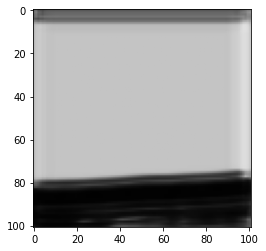

In [26]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gfg_dummy_pic.png')
imgplot = plt.imshow(img)
plt.show()

### Model Input

Populating the interactive namespace from numpy and matplotlib


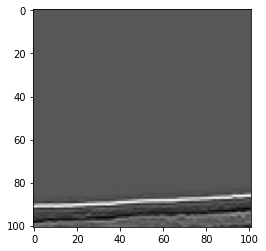

In [27]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/000a68e46c.png')
imgplot = plt.imshow(img)
plt.show()